In [1]:
#import dependencies 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
from scipy.stats import sem
import scipy.stats as sts
from scipy.stats import linregress

In [2]:
#read file from raw data folder 
csvpath = os.path.join("../Data/Alcohol_consumption/Alcohol_consumption.csv")
drink_df = pd.read_csv(csvpath)
drink_df.head()

,Unnamed: 0,Unnamed: 1,"Alcohol, total per capita (15+) consumption (in litres of pure alcohol) with 95%CI","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) with 95%CI.1","Alcohol, total per capita (15+) consumption (in litres of pure alcohol) with 95%CI.2"
0,Country,Year,Both sexes,Male,Female
1,Afghanistan,2016,0.2 [0.2-0.2],0.4 [0.4-0.4],0 [0-0]
2,Afghanistan,2010,0.2 [0.2-0.3],0.4 [0.4-0.5],0 [0-0]
3,Albania,2016,7.5 [7.1-7.8],12.5 [12-13.1],2.6 [2.5-2.7]
4,Albania,2010,7.9 [7.6-8.2],13 [12.4-13.5],2.8 [2.7-3]


In [3]:
#rename columns for easier reading 
drink_df.columns=["Country","Year","Alcohol consumption both sexes","Alcohol consumption males","Alcohol consumption females"]
drink_df

,Country,Year,Alcohol consumption both sexes,Alcohol consumption males,Alcohol consumption females
0,Country,Year,Both sexes,Male,Female
1,Afghanistan,2016,0.2 [0.2-0.2],0.4 [0.4-0.4],0 [0-0]
2,Afghanistan,2010,0.2 [0.2-0.3],0.4 [0.4-0.5],0 [0-0]
3,Albania,2016,7.5 [7.1-7.8],12.5 [12-13.1],2.6 [2.5-2.7]
4,Albania,2010,7.9 [7.6-8.2],13 [12.4-13.5],2.8 [2.7-3]
...,...,...,...,...,...
384,Yemen,2010,0.2 [0.2-0.2],0.4 [0.4-0.4],0.1 [0-0.1]
385,Zambia,2016,4.8 [4.6-5.1],8.4 [8-8.8],1.4 [1.3-1.4]
386,Zambia,2010,4.5 [4.3-4.7],7.8 [7.4-8.1],1.3 [1.3-1.4]
387,Zimbabwe,2016,4.8 [4.6-5],8.5 [8.2-8.9],1.3 [1.2-1.3]


In [4]:
#select representative countries 
selected_countries = ["United States","Mexico","Venezuela","Brazil","South Africa","Nigeria","Poland","Sweden","Russia","China","South Korea","Australia"]
drink_countries = drink_df[drink_df.Country.isin(selected_countries)]
drink_countries = drink_countries.reset_index(drop=True)
drink_countries

,Country,Year,Alcohol consumption both sexes,Alcohol consumption males,Alcohol consumption females
0,Australia,2016,10.6 [10.4-10.9],16.7 [16.3-17.1],4.7 [4.5-4.8]
1,Australia,2010,12.5 [12.1-12.8],19.4 [18.8-19.9],5.7 [5.5-5.9]
2,Brazil,2016,7.8 [7.5-8],13.4 [13-13.9],2.4 [2.3-2.5]
3,Brazil,2010,8.8 [8.5-9.1],15 [14.5-15.5],3 [2.9-3.1]
4,China,2016,7.2 [6.9-7.5],11.7 [11.3-12.1],2.5 [2.4-2.6]
5,China,2010,7.1 [6.9-7.4],11.5 [11.1-12],2.6 [2.5-2.7]
6,Mexico,2016,6.5 [6.3-6.8],11.1 [10.7-11.6],2.1 [2-2.2]
7,Mexico,2010,6.7 [6.4-7],11.3 [10.9-11.8],2.2 [2.1-2.3]
8,Nigeria,2016,13.4 [12.8-13.9],21.9 [21-22.8],4.6 [4.4-4.8]
9,Nigeria,2010,11.5 [11.2-11.8],18.7 [18.2-19.2],4.1 [4-4.2]


In [5]:
#remove the data ranges from original data for better plotting and save the cleaned data
drink_countries["Alcohol consumption both sexes"] = drink_countries["Alcohol consumption both sexes"].str.split(" ",expand=True)
drink_countries["Alcohol consumption males"] = drink_countries["Alcohol consumption males"].str.split(" ",expand=True)
drink_countries["Alcohol consumption females"] = drink_countries["Alcohol consumption females"].str.split(" ",expand=True)

drink_countries.to_csv("../Output/Clean_alcohol.csv")

In [6]:
#locate 2016 for analysis 
drink_2016 = drink_countries.loc[drink_countries["Year"]== " 2016"]
drink_2016

,Country,Year,Alcohol consumption both sexes,Alcohol consumption males,Alcohol consumption females
0,Australia,2016,10.6,16.7,4.7
2,Brazil,2016,7.8,13.4,2.4
4,China,2016,7.2,11.7,2.5
6,Mexico,2016,6.5,11.1,2.1
8,Nigeria,2016,13.4,21.9,4.6
10,Poland,2016,11.6,19.2,4.7
12,South Africa,2016,9.3,16.2,2.7
14,Sweden,2016,9.2,14.6,3.8


In [7]:
#read the annual working hours file 
csvpath = os.path.join("../Data/Working_hours/clean_annual_hours.csv")
annual_hours_df = pd.read_csv(csvpath)
annual_hours_df.head()

,Unnamed: 0,Entity,Code,Year,Average annual hours worked by persons engaged (hours per person engaged)
0,68,Australia,AUS,1950,2178.2456
1,69,Australia,AUS,1951,2158.1013
2,70,Australia,AUS,1952,2138.1436
3,71,Australia,AUS,1953,2118.3701
4,72,Australia,AUS,1954,2098.7798


In [8]:
#delete extra column 
del annual_hours_df["Unnamed: 0"]
annual_hours_df.columns=["Country","Code","Year","Annual hours worked per person"]
annual_hours_df

,Country,Code,Year,Annual hours worked per person
0,Australia,AUS,1950,2178.2456
1,Australia,AUS,1951,2158.1013
2,Australia,AUS,1952,2138.1436
3,Australia,AUS,1953,2118.3701
4,Australia,AUS,1954,2098.7798
...,...,...,...,...
581,Venezuela,VEN,2002,1829.0203
582,Venezuela,VEN,2003,1801.2109
583,Venezuela,VEN,2004,1896.6949
584,Venezuela,VEN,2005,1922.8501


In [9]:
#locate 2016 to match the drinking data 
annual_2016 = annual_hours_df.loc[annual_hours_df["Year"]== 2016]
annual_2016

,Country,Code,Year,Annual hours worked per person
66,Australia,AUS,2016,1734.2150
134,Brazil,BRA,2016,1709.4856
182,China,CHN,2016,2174.3501
250,Mexico,MEX,2016,2255.0000
258,Nigeria,NGA,2016,1827.2401
283,Poland,POL,2016,2050.3591
309,Russia,RUS,2016,1974.0000
326,South Africa,ZAF,2016,2209.0916
391,South Korea,KOR,2016,2063.3315
459,Sweden,SWE,2016,1626.4591


In [10]:
#merge on country and delete extra year column 
drink_hours_df = pd.merge(drink_2016, annual_2016, on="Country")
del drink_hours_df["Year_y"]
drink_hours_df.head(100)

,Country,Year_x,Alcohol consumption both sexes,Alcohol consumption males,Alcohol consumption females,Code,Annual hours worked per person
0,Australia,2016,10.6,16.7,4.7,AUS,1734.2150
1,Brazil,2016,7.8,13.4,2.4,BRA,1709.4856
2,China,2016,7.2,11.7,2.5,CHN,2174.3501
3,Mexico,2016,6.5,11.1,2.1,MEX,2255.0000
4,Nigeria,2016,13.4,21.9,4.6,NGA,1827.2401
5,Poland,2016,11.6,19.2,4.7,POL,2050.3591
6,South Africa,2016,9.3,16.2,2.7,ZAF,2209.0916
7,Sweden,2016,9.2,14.6,3.8,SWE,1626.4591


In [11]:
#check for the formatting of column titles  
drink_hours_df.columns

Index(['Country', 'Year_x', 'Alcohol consumption both sexes',
       'Alcohol consumption males', 'Alcohol consumption females', 'Code',
       'Annual hours worked per person'],
      dtype='object')

The r-squared is: 0.08398754318255176


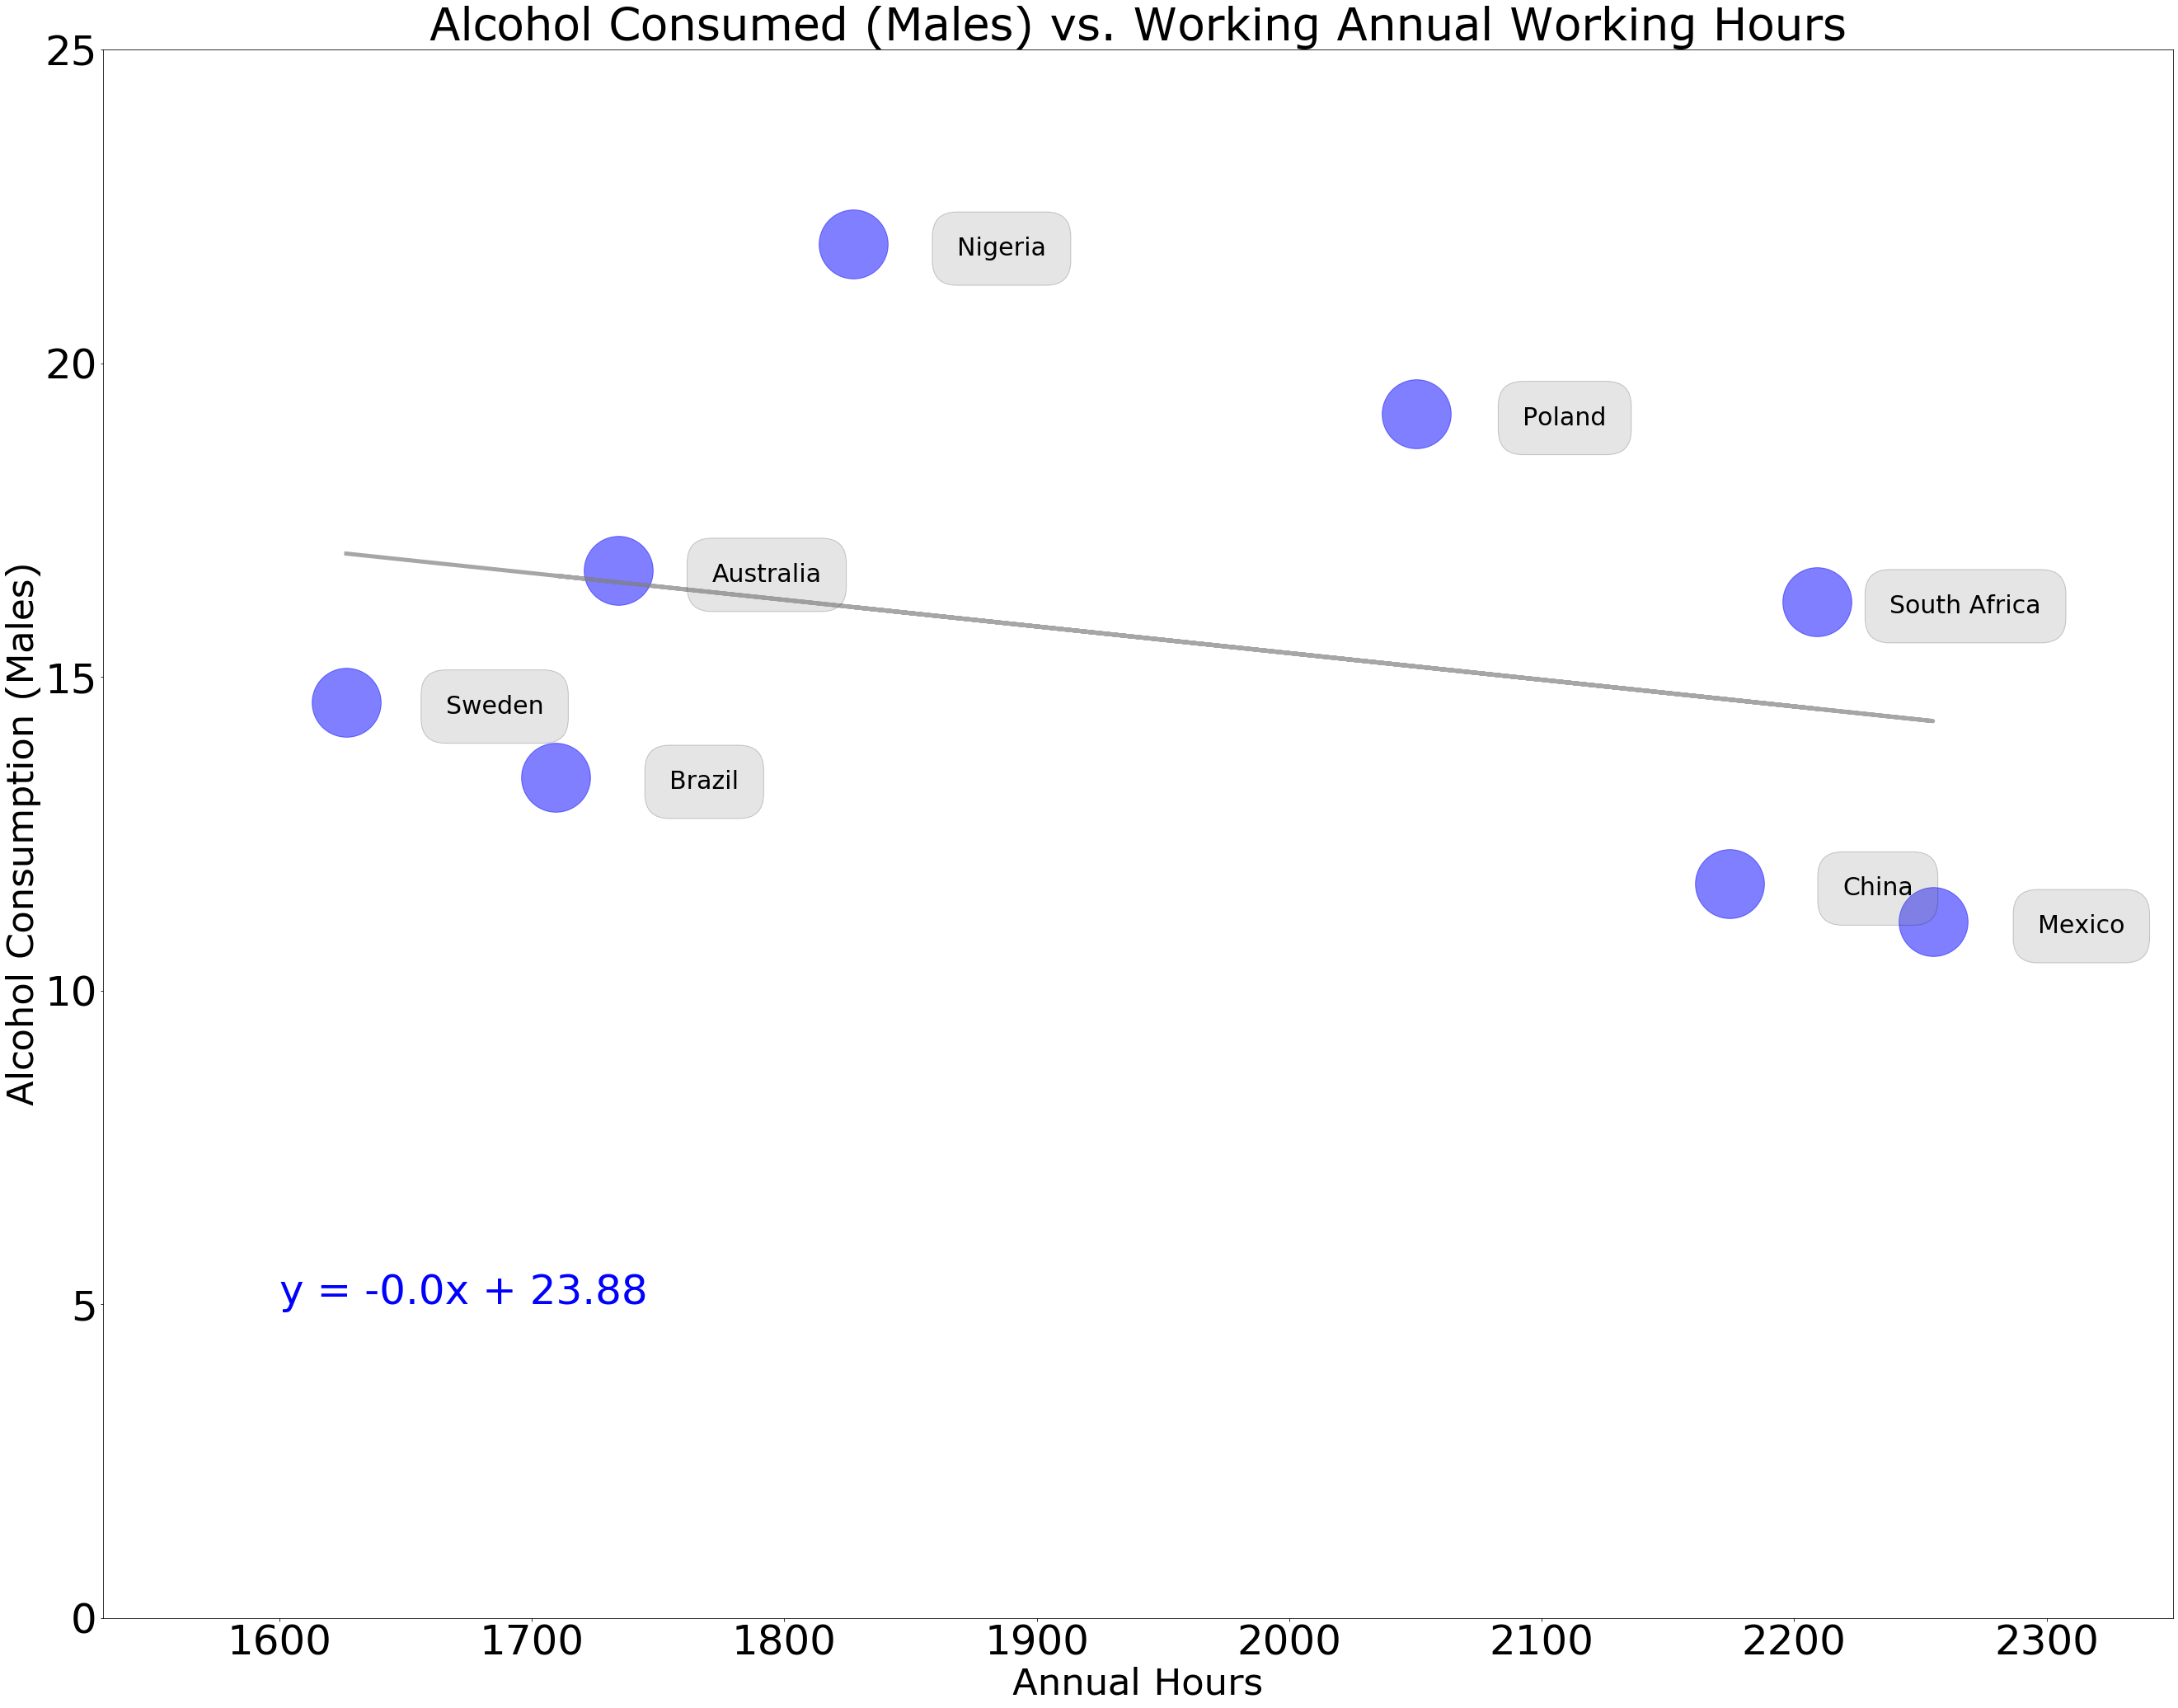

In [15]:
#make scatter plot for males 
labels = drink_hours_df["Country"]
x_values = drink_hours_df['Annual hours worked per person'].astype(float)
y_values = drink_hours_df[ 'Alcohol consumption males'].astype(float)
plt.figure(figsize=(45,35))
plt.xlim(1530, 2350)
plt.ylim(0, 25)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Alcohol Consumed (Males) vs. Working Annual Working Hours",fontsize=55,fontname ="Verdana")
plt.xlabel("Annual Hours",fontsize=45,fontname ="Verdana")
plt.ylabel("Alcohol Consumption (Males)",fontsize=45,fontname ="Verdana")


plt.scatter(x_values,y_values,color='blue',alpha=0.5, marker="o",s=7000)
plt.plot(x_values,regress_values,"r-",color="gray",linewidth=5,alpha =.7)
plt.annotate(line_eq,(1600,5),fontsize=50,color="blue")

for label, x, y in zip(labels, x_values, y_values):
    plt.annotate(
        label,
        xy=(x, y), xytext=(180, -20),
        textcoords='offset points', ha='center',va='bottom', fontsize=30,
        bbox=dict(boxstyle='round,pad=1', fc='gray', alpha=0.2),
        )

print(f"The r-squared is: {rvalue**2}")
plt.savefig("alcohol_selected_males.png")

The r-squared is: 0.1297296035521562


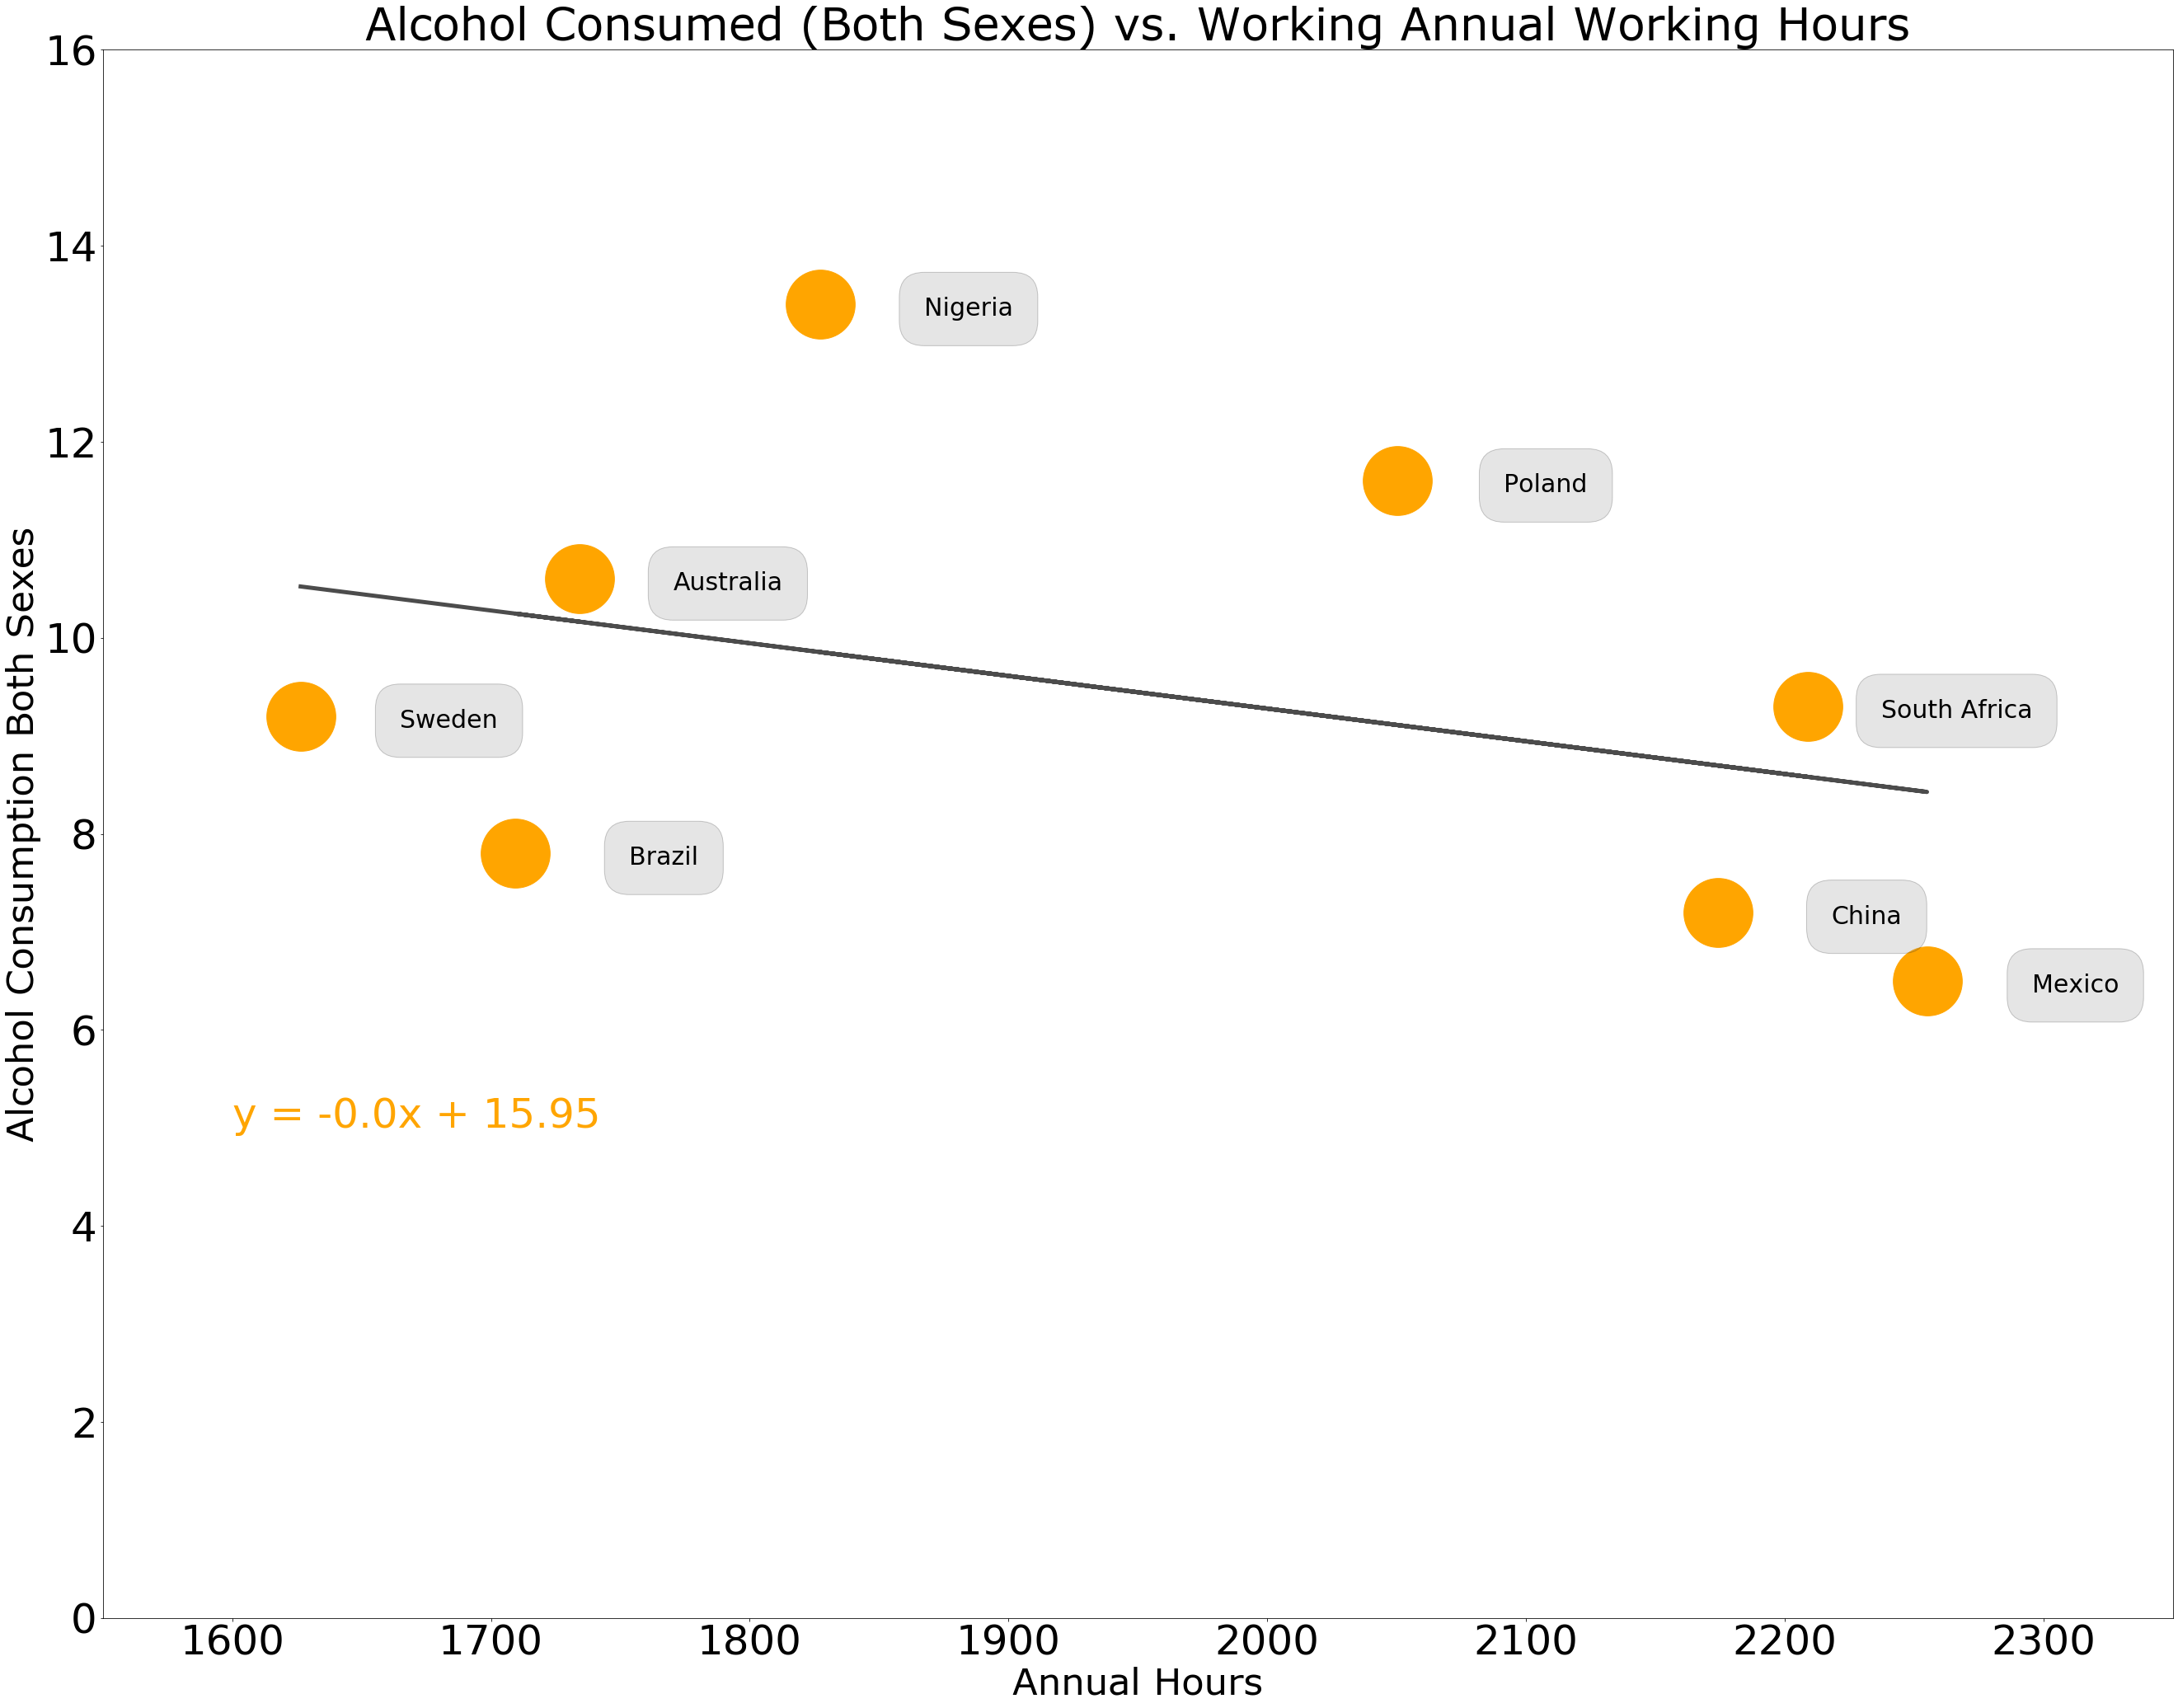

In [19]:
#make scatter plot for both sexes 
labels = drink_hours_df["Country"]
x_values = drink_hours_df['Annual hours worked per person'].astype(float)
y_values = drink_hours_df[ 'Alcohol consumption both sexes'].astype(float)
plt.figure(figsize=(45,35))
plt.xlim(1550, 2350)
plt.ylim(0, 16)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Alcohol Consumed (Both Sexes) vs. Working Annual Working Hours",fontsize=55,fontname ="Verdana")
plt.xlabel("Annual Hours",fontsize=45,fontname ="Verdana")
plt.ylabel("Alcohol Consumption Both Sexes",fontsize=45,fontname ="Verdana")


plt.scatter(x_values,y_values,color='orange',marker="o",s=7000)
plt.plot(x_values,regress_values,"r-",color="black",linewidth=5,alpha =.7)
plt.annotate(line_eq,(1600,5),fontsize=50,color="orange")

for label, x, y in zip(labels, x_values, y_values):
    plt.annotate(
        label,
        xy=(x, y), xytext=(180, -20),
        textcoords='offset points', ha='center',va='bottom', fontsize=30,
        bbox=dict(boxstyle='round,pad=1', fc='gray', alpha=0.2))

print(f"The r-squared is: {rvalue**2}")
plt.savefig("alcohol_selected_both.png")

The r-squared is: 0.23400360417136257


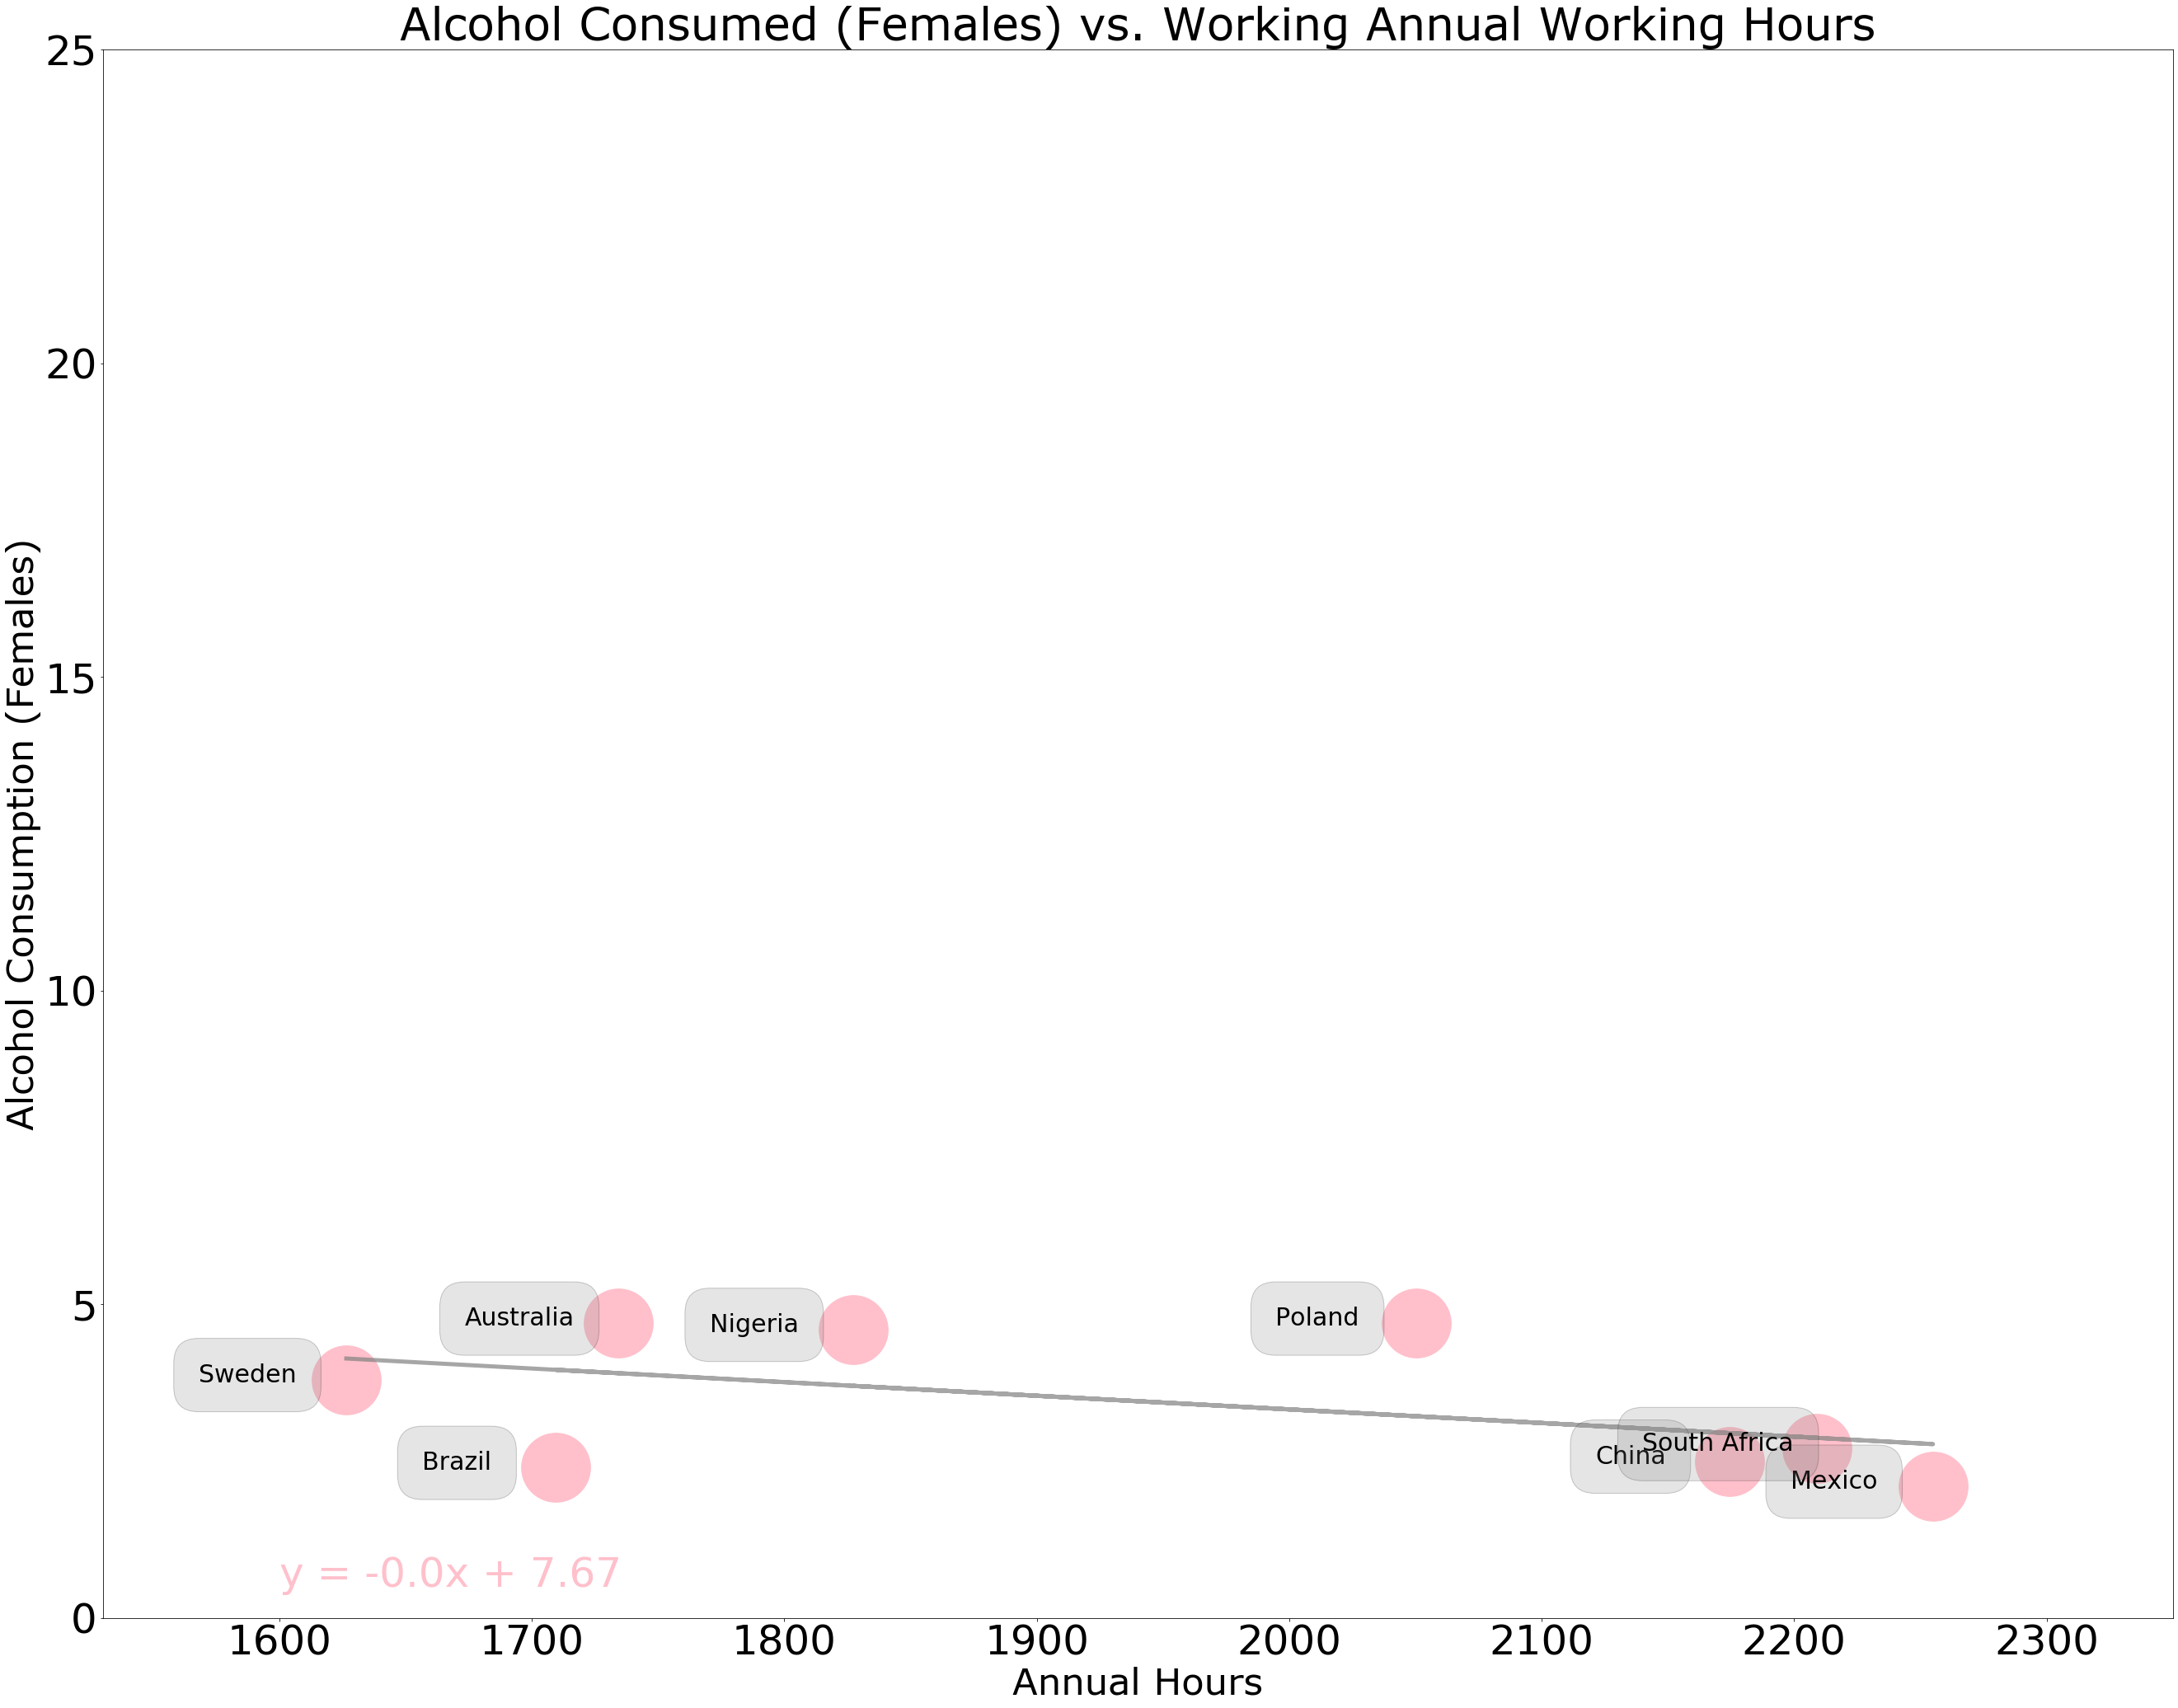

In [22]:
#make scatter plot for females 
labels = drink_hours_df["Country"]
x_values = drink_hours_df['Annual hours worked per person'].astype(float)
y_values = drink_hours_df[ 'Alcohol consumption females'].astype(float)
plt.figure(figsize=(45,35))
plt.xlim(1530, 2350)
plt.ylim(0, 25)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Alcohol Consumed (Females) vs. Working Annual Working Hours",fontsize=55,fontname ="Verdana")
plt.xlabel("Annual Hours",fontsize=45,fontname ="Verdana")
plt.ylabel("Alcohol Consumption (Females)",fontsize=45,fontname ="Verdana")

plt.scatter(x_values,y_values,color='pink',marker="o",s=7000)
plt.plot(x_values,regress_values,"r-",color="gray",linewidth=5,alpha =.7)
plt.annotate(line_eq,(1600,0.5),fontsize=50,color="pink")

for label, x, y in zip(labels, x_values, y_values):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-120, 20),
        textcoords='offset points', ha='center',va='top', fontsize=30,
        bbox=dict(boxstyle='round,pad=1', fc='gray', alpha=0.2))

print(f"The r-squared is: {rvalue**2}")
plt.savefig("alcohol_selected_females.png")